In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [10]:
img = cv.imread('peppers.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


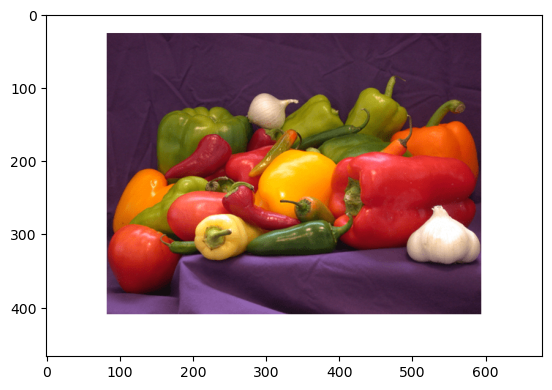

In [11]:
plt.imshow(img)
plt.show()

## Inspecionando os canais

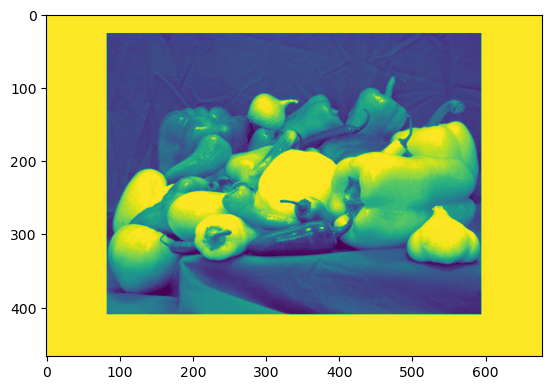

In [12]:
plt.imshow(img[:, :, 0])
plt.show()

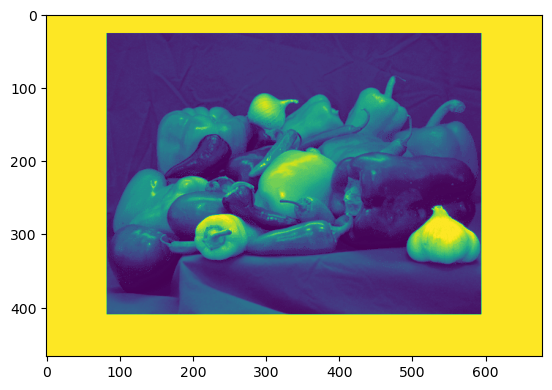

In [13]:
plt.imshow(img[:, :, 1])
plt.show()

## Transformando para HSV

In [55]:
#convertendo de RGB para HSV
hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)

In [ ]:
plt.imshow(hsv_img)
plt.show()

In [ ]:
plt.imshow(hsv_img[:, :, 2])
plt.show()

In [136]:
lower_green = np.array([26,  3,  12])  # Valores mínimos de H, S e V para verde
upper_green = np.array([89, 255, 255])  # Valores máximos de H, S e V para verde

In [137]:
# Criar uma máscara para os valores dentro do intervalo de verde
green_mask = cv.inRange(hsv_img, lower_green, upper_green)

# Aplicar a máscara na imagem original para isolar a cor verde
result = cv.bitwise_and(hsv_img, hsv_img, mask=green_mask)
result = cv.cvtColor(result, cv.COLOR_HSV2RGB)

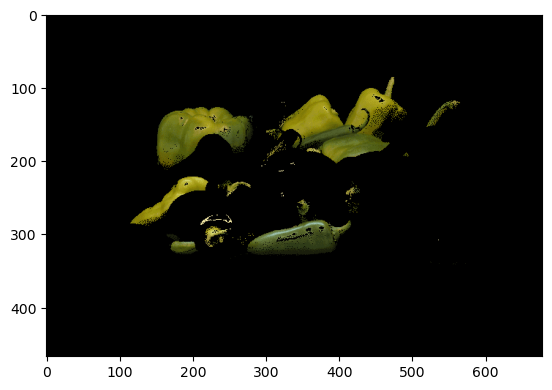

In [138]:
plt.imshow(result)
plt.show()

## Morfologia matemática


### Erode

$A \ominus B $


In [157]:
kernel = np.ones((5,5), np.uint8)

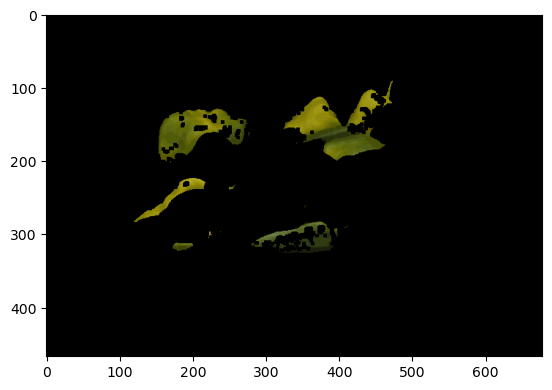

In [158]:
eroded_img = cv.erode(result, kernel)

plt.imshow(eroded_img)
plt.show()

### Dilatate 

$A \oplus B$

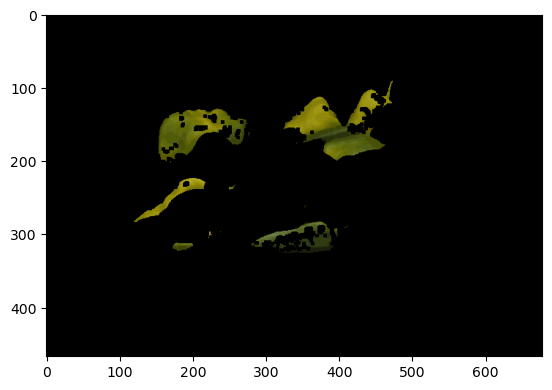

In [159]:
#Erode 
dilated_img = cv.dilate(result, kernel)

plt.imshow(eroded_img)
plt.show()

### Closing 

#### Abordagem força bruta: 

$A \cdot B = (A \oplus B)  \ominus B $


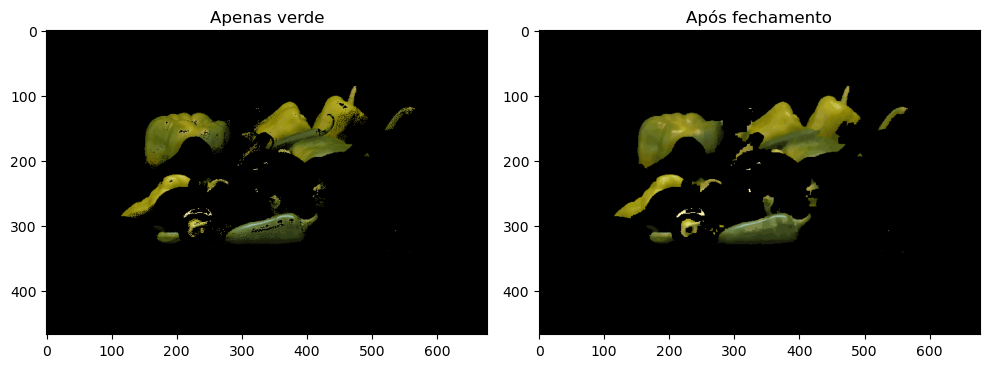

In [172]:
fechamento = cv.erode(dilated_img, kernel)

fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].imshow(result)
ax[0].set_title("Apenas verde")
ax[1].imshow(fechamento)
ax[1].set_title("Após fechamento")

plt.tight_layout()
plt.show()

### Opening
$ A \circ B  = (A \ominus B) \oplus B$

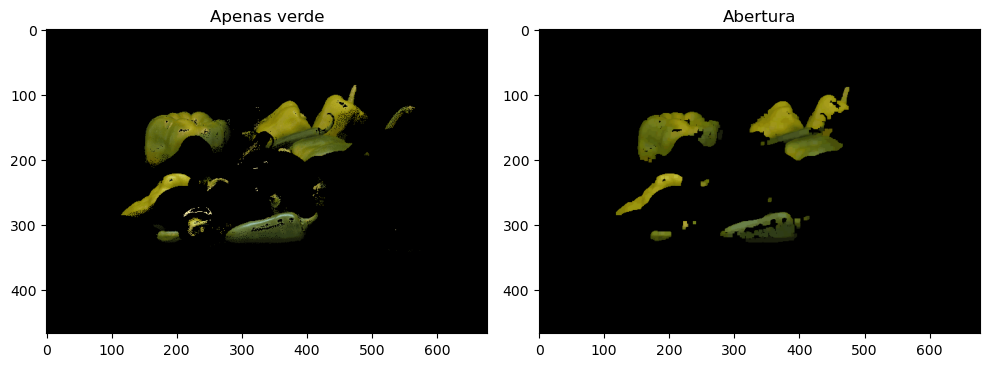

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))


abertura = cv.dilate(eroded_img, kernel)

ax[0].imshow(result)
ax[0].set_title("Apenas verde")
ax[1].imshow(abertura)
ax[1].set_title("Abertura")

plt.tight_layout()
plt.show()